In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import get_scorer_names
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

In [3]:
data = pd.read_csv("C:/Users\plaoz\Desktop\ProjectsAlp\drug200_c.csv")


In [65]:
copy = pd.read_csv("C:/Users\plaoz\Desktop\ProjectsAlp\drug200_c.csv")

In [4]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
print(data.isna().sum())
print(data.duplicated().sum())

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64
0


C:\Users\plaoz\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


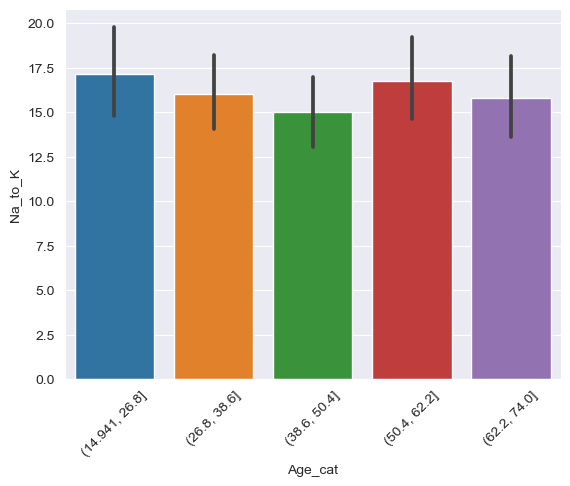

In [80]:
copy["Age_cat"] = pd.cut(copy["Age"], bins = 5)
sns.barplot(data = copy, x= "Age_cat", y = "Na_to_K")
plt.xticks(rotation = 45)
plt.show()

C:\Users\plaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


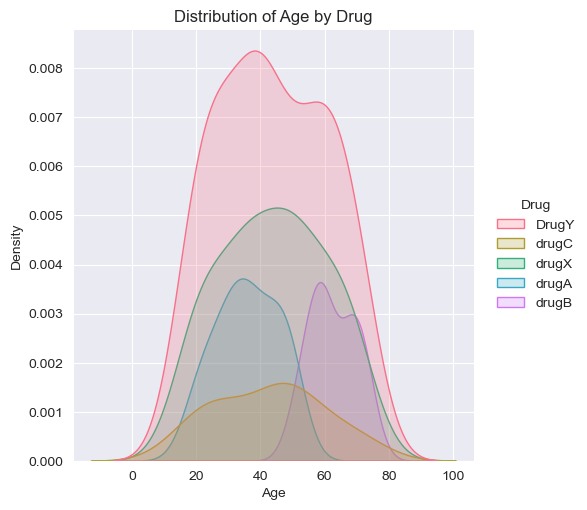

In [94]:
sns.displot(data = copy, x = "Age", hue = "Drug", kind= "kde", fill = True,  palette = "husl")
plt.title("Distribution of Age by Drug")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

Text(0.5, 1.0, 'Distribution of Drugs')

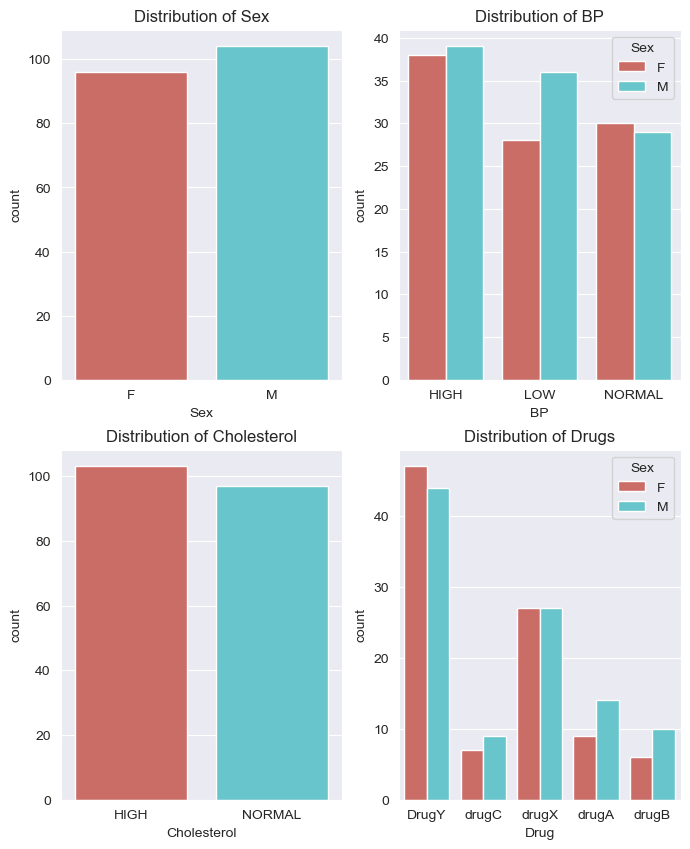

In [98]:
fig, axes = plt.subplots(2, 2, figsize= (8,10))

sns.countplot(copy, x = "Sex", ax = axes[0,0], palette= "hls")
axes[0,0].set_title("Distribution of Sex")

sns.countplot(copy, x = "BP", hue = "Sex", ax = axes[0,1], palette= "hls")
axes[0,1].set_title("Distribution of BP")
sns.countplot(copy, x = "Cholesterol", ax = axes[1,0], palette= "hls")
axes[1,0].set_title("Distribution of Cholesterol")
sns.countplot(copy, x = "Drug", hue = "Sex", ax = axes[1,1], palette= "hls")
axes[1,1].set_title("Distribution of Drugs")

<Axes: xlabel='Sex', ylabel='Age'>

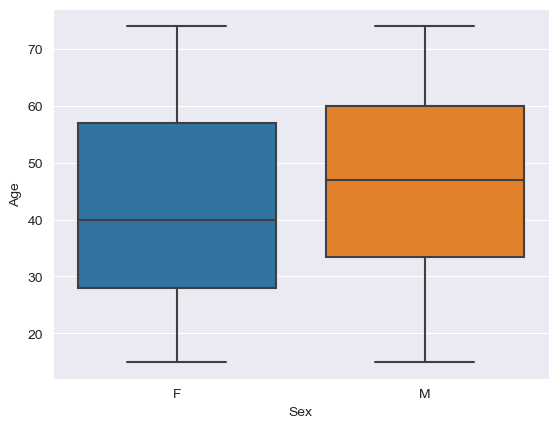

In [8]:
sns.boxplot(data, x = "Sex", y = "Age")

In [9]:
encoder = LabelEncoder()
data["Sex"] = encoder.fit_transform(data["Sex"])
data["Cholesterol"] = encoder.fit_transform(data["Cholesterol"])
data["BP"] = encoder.fit_transform(data["BP"])
data["Drug"] = encoder.fit_transform(data["Drug"])


In [10]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


<Axes: >

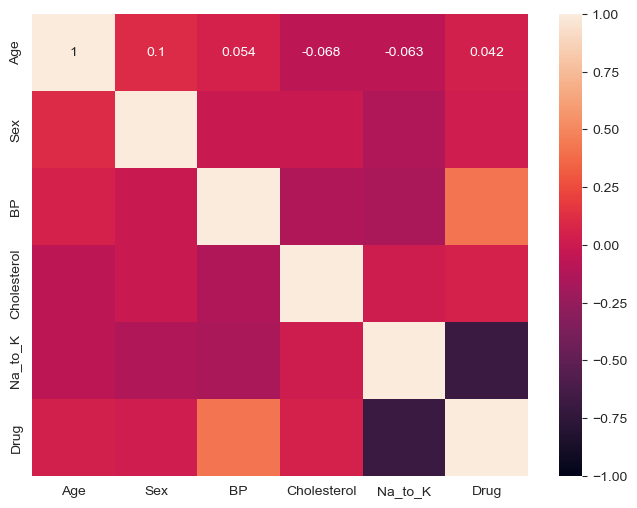

In [11]:
cor = data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(cor, vmin = -1, vmax = 1, annot = True)

We seperate our data into target and features

In [12]:
X = data.drop("Drug", axis = 1)
y = data["Drug"]

Let's select our models and train them

In [13]:
num_classes = 5
class_counts = np.zeros(num_classes, dtype= int)

In [14]:
for i in range(num_classes):
    class_counts[i] = (data["Drug"] == i).sum()
    
for i, count in enumerate(class_counts):
    print("Number of class", i, ":", count)

Number of class 0 : 91
Number of class 1 : 23
Number of class 2 : 16
Number of class 3 : 16
Number of class 4 : 54


As you can see classes are not distributed normally.

In [18]:
smote = SMOTE(random_state = 55)

X_res, y_res = smote.fit_resample(X, y)

In [20]:
for i in range(num_classes):
    class_counts[i] = (y_res == i).sum()

for i, count in enumerate(class_counts):
    print("Number of class", i, ":", count)

Number of class 0 : 91
Number of class 1 : 91
Number of class 2 : 91
Number of class 3 : 91
Number of class 4 : 91


We can see that we have a normal distribution of classes

I am going to use a Pipeline to compare our results. Normally using them seperatly might be a better option but I want to improve my self on pipelines too.

In [32]:
pipeline_KNN = Pipeline([
    ("Scaler" , StandardScaler()),
    ("KNN", KNeighborsClassifier(n_neighbors= 5))
])

pipeline_tree = Pipeline(
    [("Scaler", StandardScaler()),
    ("Tree", DecisionTreeClassifier())]
)

pipeline_logistic = Pipeline(
    [("Scaler", LogisticRegression(max_iter = 100000))]
    
)

pipelines = {"KNN": pipeline_KNN, "Tree": pipeline_tree, "Logistic": pipeline_logistic}

In [33]:
kf = KFold(n_splits= 5, shuffle = True, random_state= 55)

In [48]:
# Create an empty list to store the results
results = []

# Iterate over each model pipeline and calculate accuracy
for name, pipeline in pipelines.items():
    scores = cross_val_score(pipeline, X_res, y_res, cv=kf, scoring="accuracy")
    best_accuracy = scores.max()  # Get the highest accuracy score
    print(f"Model: {name}, accuracy: {best_accuracy}")

    # Append the results to the list
    results.append({"Model": name, "Accuracy": best_accuracy})
results_df = pd.DataFrame(results)
print(results_df)

Model: KNN, accuracy: 0.9340659340659341
Model: Tree, accuracy: 0.989010989010989
Model: Logistic, accuracy: 0.978021978021978
      Model  Accuracy
0       KNN  0.934066
1      Tree  0.989011
2  Logistic  0.978022


In [49]:
results_df

,Model,Accuracy
0,KNN,0.934066
1,Tree,0.989011
2,Logistic,0.978022
